In [1]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow_datasets as tfds

import pickle

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

from sklearn.model_selection import train_test_split

READ DATA

In [2]:
(train_data, test_data), ds_info = tfds.load(name="caltech101",
                                             split=["train", "test"],
                                             shuffle_files=True,
                                             as_supervised=True, # Data gets returned in tuple format (data, label)
                                             with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/3060 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/caltech101/3.0.2.incompleteQZHJZ3/caltech101-train.tfrecord*...:   0%|    …

Generating test examples...:   0%|          | 0/6084 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/caltech101/3.0.2.incompleteQZHJZ3/caltech101-test.tfrecord*...:   0%|     …

Dataset caltech101 downloaded and prepared to /root/tensorflow_datasets/caltech101/3.0.2. Subsequent calls will reuse this data.


In [3]:
class_names = ds_info.features["label"].names

In [4]:
train_data, test_data = test_data,train_data

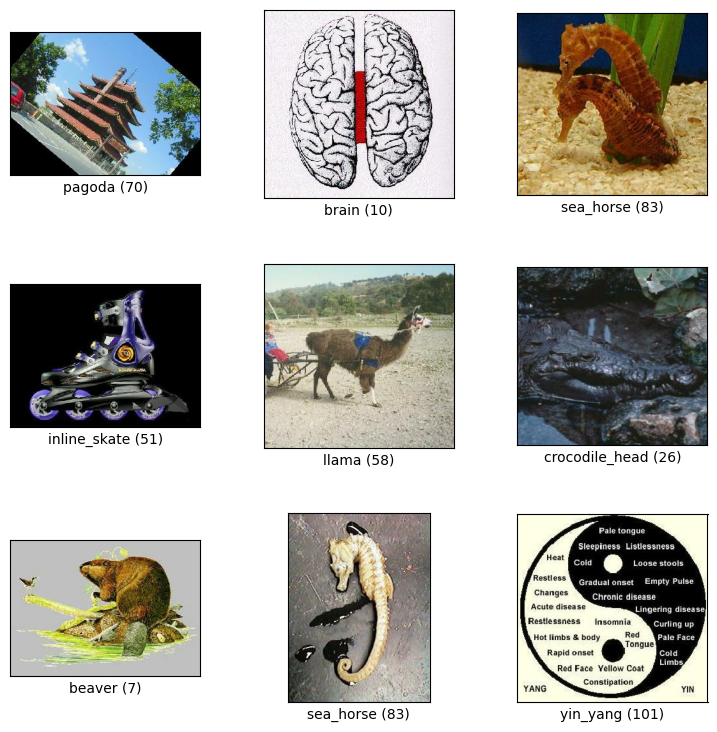

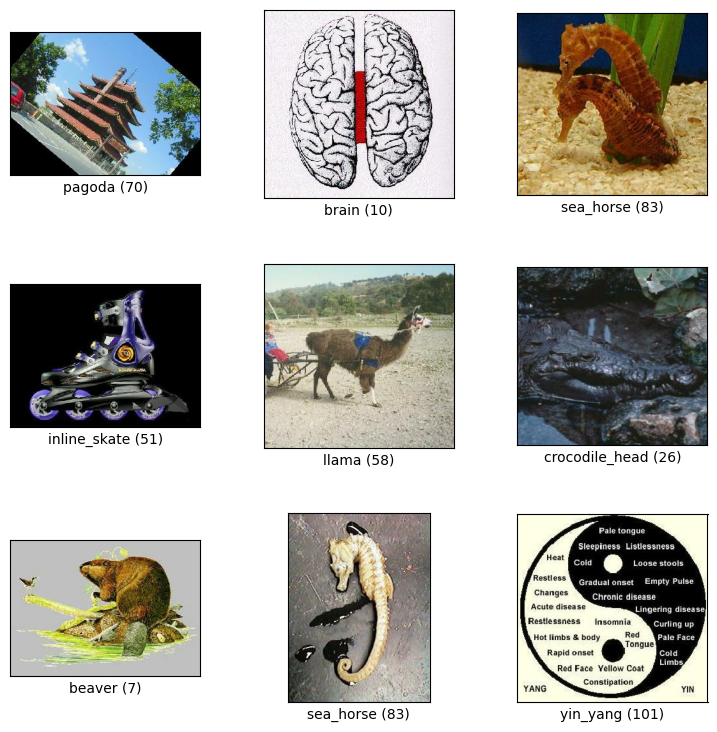

In [6]:
tfds.show_examples(test_data, ds_info)

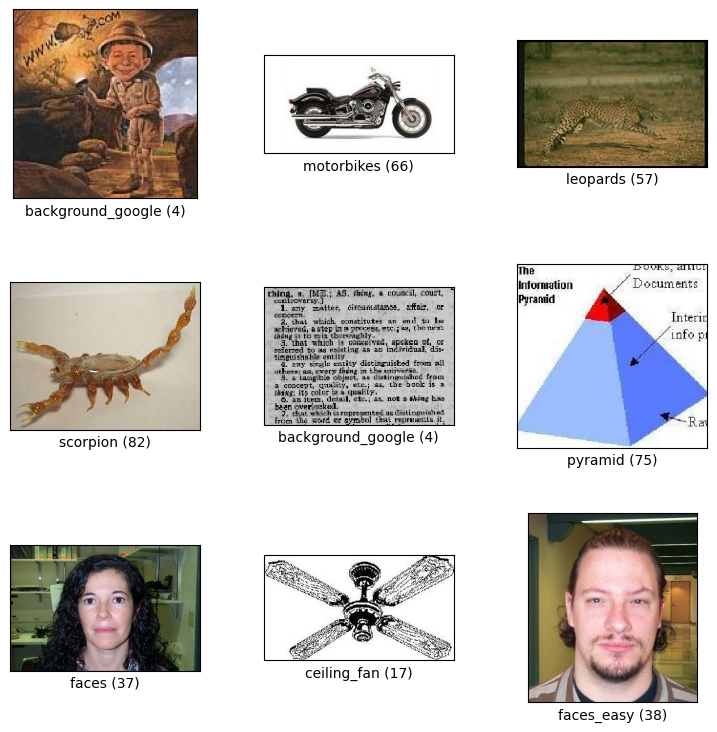

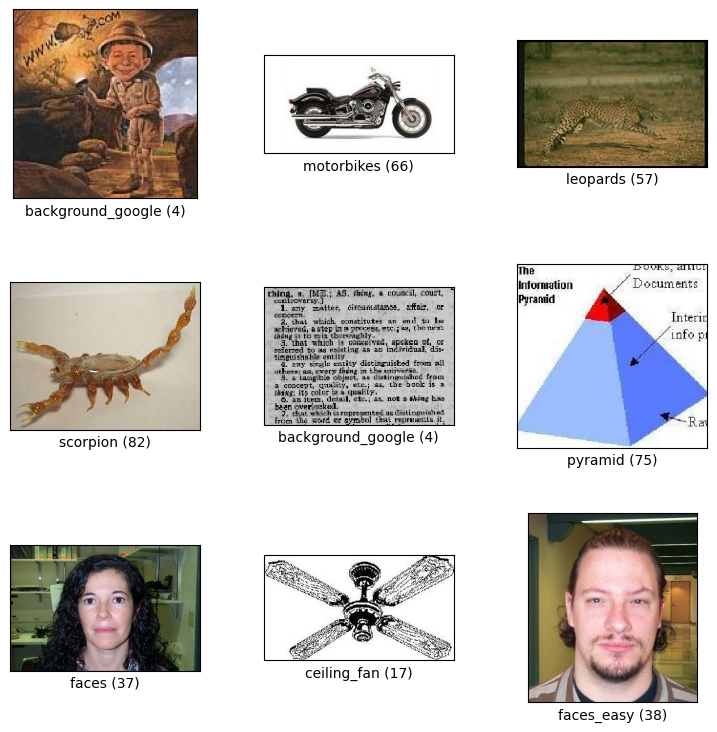

In [5]:
tfds.show_examples(train_data, ds_info)

In [7]:
def preprocess_image(image, label):
  # One Hot Encoding
  # 0 1 2 3 4 5 6 7 8 9
  # example 4
  # 0 0 0 0 1 0 0 0 0 0
  return tf.cast(tf.image.resize_with_crop_or_pad(image, 224,224), tf.float32) / 255., tf.one_hot(label, depth=len(class_names))


In [8]:
mapped_train_data = train_data.map(preprocess_image).batch(32)
mapped_test_data = test_data.map(preprocess_image).batch(32)

(224, 224, 3)


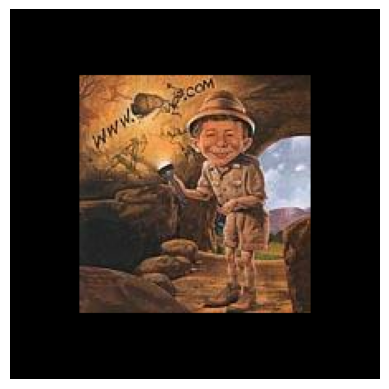

In [12]:
for images, labels in mapped_train_data.take(1):  # Take one batch
    # Select the first image from the batch
    image = images[0]

    # Reshape the image tensor if necessary (remove the batch dimension)
    image = tf.squeeze(image)
    print(image.shape)
    # Display the image
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

Data Plotting

In [ ]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss'])) # How many epochs


    # Plot loss
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

VGG

In [ ]:
model = Sequential()

#Block 1
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides=(2,2)))

#Block 2
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides=(2,2)))

#Block 3
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides=(2,2)))

#Block 4
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides=(2,2)))

#Block 5
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides=(2,2)))


#Output
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(102, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 222, 222, 64)      36928     
                                                                 
 batch_normalization_5 (Bat  (None, 222, 222, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 111, 111, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 111, 111, 128)     73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 111, 111, 128)    

In [ ]:
model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
history_vgg = model.fit(mapped_train_data,epochs=30, batch_size=32, validation_data=mapped_test_data)

Epoch 1/30
191/191 [==============================] - 111s 550ms/step - loss: 4.8111 - accuracy: 0.2893 - val_loss: 4.8136 - val_accuracy: 0.0098
Epoch 2/30
191/191 [==============================] - 105s 549ms/step - loss: 2.7583 - accuracy: 0.3736 - val_loss: 5.4251 - val_accuracy: 0.0320
Epoch 3/30
191/191 [==============================] - 112s 585ms/step - loss: 2.4177 - accuracy: 0.4209 - val_loss: 5.3842 - val_accuracy: 0.0807
Epoch 4/30
191/191 [==============================] - 111s 583ms/step - loss: 2.1631 - accuracy: 0.4591 - val_loss: 6.8890 - val_accuracy: 0.1101
Epoch 5/30
191/191 [==============================] - 104s 547ms/step - loss: 1.9126 - accuracy: 0.5000 - val_loss: 9.0152 - val_accuracy: 0.0922
Epoch 6/30
191/191 [==============================] - 104s 545ms/step - loss: 1.7171 - accuracy: 0.5388 - val_loss: 8.0431 - val_accuracy: 0.1190
Epoch 7/30
191/191 [==============================] - 104s 545ms/step - loss: 1.5083 - accuracy: 0.5965 - val_loss: 9.9831 -

In [ ]:
with open('history_vgg.pkl', 'wb') as f:
    pickle.dump(history_vgg, f)

In [ ]:
with open('/content/history_vgg.pkl', 'rb') as f:
    history_vgg = pickle.load(f)

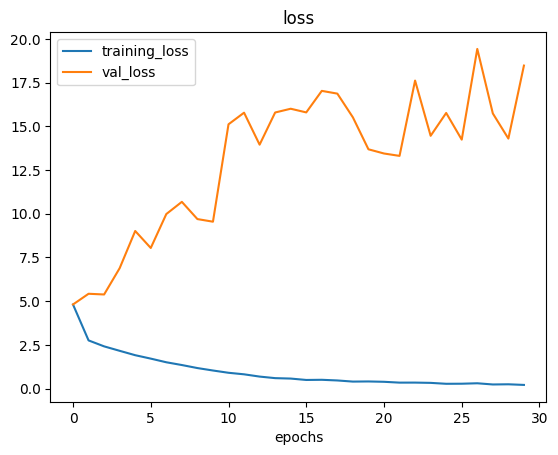

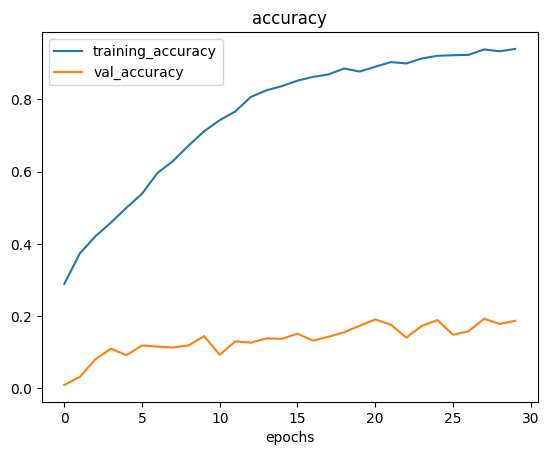

In [ ]:
plot_loss_curves(history_vgg)

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Define the path to save the history file in Google Drive
save_path = '/content/drive/My Drive/history_vgg.pkl'

# Serialize and save the history object to a file
with open(save_path, 'wb') as file:
    pickle.dump(history_vgg, file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
